A:
[[  1.           1.5          2.335        3.7575       6.22333
   10.562475  ]
 [  1.5          2.335        3.7575       6.22333     10.562475
   18.2977405 ]
 [  2.335        3.7575       6.22333     10.562475    18.2977405
   32.24206275]
 [  3.7575       6.22333     10.562475    18.2977405   32.24206275
   57.62299933]
 [  6.22333     10.562475    18.2977405   32.24206275  57.62299933
  104.2080975 ]
 [ 10.562475    18.2977405   32.24206275  57.62299933 104.2080975
  190.33657339]]
b:
[ 0.1255399   0.11457826  0.07412306 -0.02777794 -0.25388979 -0.72668312]
c:
[ 3.04885128 -4.12993741  2.50358825 -1.01080971  0.23814613 -0.02444771]
ф(x) = 3.048851280886609 - 4.129937412444065x + 2.503588248171199x^2 - 1.0108097110105916x^3 + 0.23814612727402626x^4 - 0.024447705239081054x^5 
Maximum deficiency: 8.216176112130213e-06


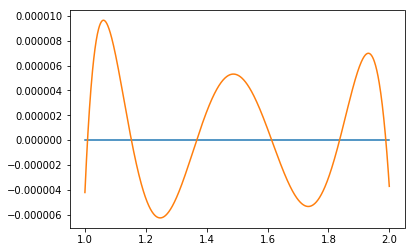

In [2]:
import numpy as np
from math import exp, log
import matplotlib.pyplot as plt

a = 1.0
b = 2.0
N = 10
delta = (b - a) / N
n = 5
alpha = 1.7

points = [a + i * delta for i in range(N + 1)]

def l2scalar(f, g):
    values = [f(point) * g(point) for point in points]
    return np.trapz(values, points)

def l2norm(f):
    return l2scalar(f, f)

def f(x):
    return alpha * exp(-x) + (1 - alpha) * log(x)

def phi(i):
    return lambda x: x ** i

def getPhi(c):
    phi = "ф(x) = "
    for i in range(len(c)):
        if c[i] < 0:
            phi += "- " + str(abs(c[i]))
        else:
            if i != 0:
                phi += "+ "
            phi += str(c[i])
        if i != 0:
            phi += "x"
            if i != 1:
                phi += "^" + str(i)
        phi += " "
    return phi

def solution(x, c):
    value = 0.0
    for i in range(len(c)):
        value += c[i] * phi(i)(x)
    return value

def plotDifference(samples):
    space = np.linspace(a, b, samples)
    plt.plot(space, np.zeros(np.shape(space)))
    plt.plot(space, np.array([solution(x, c) - f(x) for x in space], dtype=np.double))
    plt.show()
    
if __name__ == '__main__':
    A = np.array([[l2scalar(phi(i), phi(j)) for j in range(n + 1)] for i in range(n + 1)],
                 dtype = np.double)
    B = np.array([l2scalar(f, phi(i)) for i in range(n + 1)], dtype = np.double)

    print("A:\n" + str(A))
    print("b:\n" + str(B))

    c = np.linalg.solve(A, B)

    print("c:\n" + str(c))
    
    print(getPhi(c))

    check = [points[0] + delta / 2.6, 
             points[5] + delta / 2.6,
             points[9] + delta / 2.6]

    print("Maximum deficiency: " + 
          str(np.max(np.abs(np.array([(solution(point, c) - f(point)) for point in check], dtype=np.double)))))
    
    plotDifference(1000)